In [81]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Define the start and end dates for the sales data
start_date = pd.to_datetime('1/1/2021')
end_date = pd.to_datetime('12/31/2023')

# Define product names and categories
products = ['Pixelophone_XL', 'Pixeltab_Pro', 'Pixelbook_Ultra', 'Pixelwatch_Active', 'Pixelbuds_Air', 
            'Galactic_S21', 'GalaxyTab_S7', 'GalaxyBook_13', 'GalaxyWatch_3', 'GalaxyBuds_Pro']
categories = ['Pixel', 'Pixel', 'Pixel', 'Pixel', 'Pixel', 'Galaxy', 'Galaxy', 'Galaxy', 'Galaxy', 'Galaxy']


# Store all DataFrames
all_dfs = []

for product, category in zip(products, categories):

    # Randomly select a product launch date within 2021
    product_launch_date = start_date + pd.Timedelta(days=np.random.randint(0, 365))
    
    # Randomly select a product end date within 2023
    product_end_date = end_date - pd.Timedelta(days=np.random.randint(0, 365))

    # Create dates range from launch to end_date
    timestamps = pd.date_range(start=product_launch_date, end=product_end_date, freq='D')
    n_days = len(timestamps)
    
    # Create a DataFrame for each product
    df = pd.DataFrame({
        'Date': timestamps,
        'Product': product,
        'Category': category,
        'Sales': np.zeros(n_days)
    })

    # Define sales patterns for each phase
    intro_growth = np.linspace(10, 100, num=int(n_days*1/6))
    growth = np.linspace(100, 1000 + np.random.randint(0, 200), num=int(n_days*1/3))  # Randomize max sales
    maturity = np.linspace(1000 + np.random.randint(0, 200), 900, num=int(n_days*1/6))
    decline = np.linspace(900, 100, num=n_days - len(intro_growth) - len(growth) - len(maturity))

    # Combine the sales patterns
    sales = np.concatenate([intro_growth, growth, maturity, decline])

    # Apply the sales pattern to the DataFrame
    df['Sales'] = sales

    # Add slight day-to-day sales variability
    df['Sales'] += np.random.normal(0, 50, size=n_days)
    df['Sales'] = df['Sales'].clip(lower=0)


    # Create an index to apply holiday effects
    holiday_index = df['Date'].apply(lambda x: x.month in [12, 1, 7])

    # Increase sales on holidays by a factor (e.g., 1.5)
    df.loc[holiday_index, 'Sales'] *= 1.5

    # Round sales to integer values
    df['Sales'] = df['Sales'].round(0).astype(int)
    
    all_dfs.append(df)

# Combine all dataframes
full_df = pd.concat(all_dfs)

# Choose one product for the media campaign, for example 'Pixelophone XL'
media_campaign_product = 'Pixelophone_XL'

# Increase sales for the campaign product over a given period
campaign_start = pd.Timestamp('2023-01-01')
campaign_end = pd.Timestamp('2023-06-30')

campaign_index = (full_df['Product'] == media_campaign_product) & (full_df['Date'].between(campaign_start, campaign_end))
full_df.loc[campaign_index, 'Sales'] *= 1.5
full_df.loc[campaign_index, 'Sales'] = full_df.loc[campaign_index, 'Sales'].round(0).astype(int)


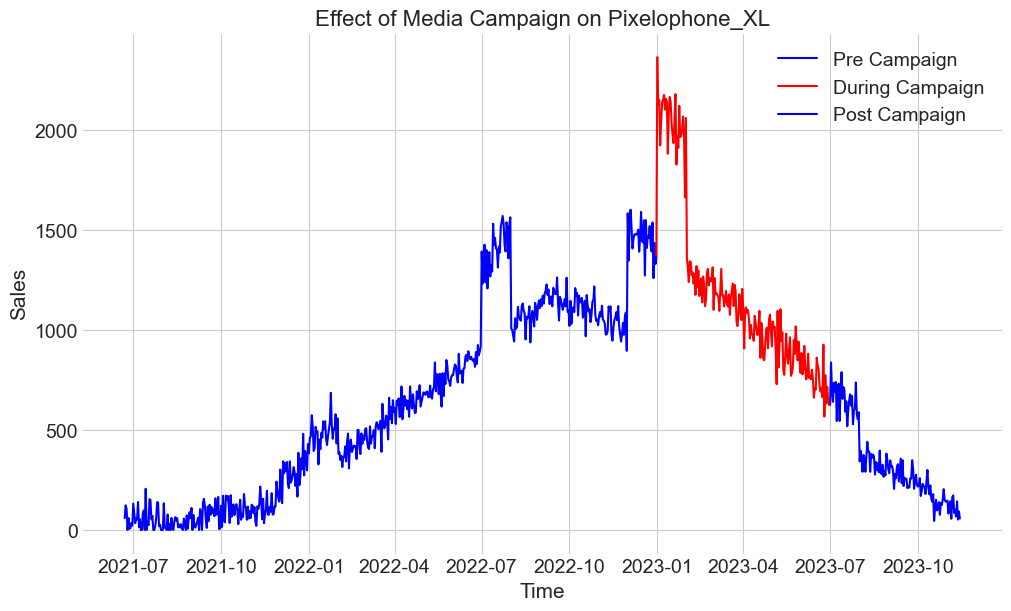

In [86]:
import matplotlib.pyplot as plt

# Check the effect of the media campaign on the selected product's sales
media_campaign_data = full_df[full_df['Product'] == media_campaign_product]

# Split the data into pre, during and post campaign periods
pre_campaign_data = media_campaign_data[media_campaign_data['Date'] < campaign_start]
during_campaign_data = media_campaign_data[(media_campaign_data['Date'] >= campaign_start) & (media_campaign_data['Date'] <= campaign_end)]
post_campaign_data = media_campaign_data[media_campaign_data['Date'] > campaign_end]

plt.figure(figsize=(10, 6))

# Plot the pre campaign sales with a specific color (for example, 'blue')
plt.plot(pre_campaign_data['Date'], pre_campaign_data['Sales'], color='blue', label='Pre Campaign')

# Plot the during campaign sales with a different color (for example, 'red')
plt.plot(during_campaign_data['Date'], during_campaign_data['Sales'], color='red', label='During Campaign')

# Plot the post campaign sales with the same color as pre campaign (for example, 'blue')
plt.plot(post_campaign_data['Date'], post_campaign_data['Sales'], color='blue', label='Post Campaign')

# Plot the joining line between pre and during campaign
plt.plot([pre_campaign_data['Date'].iloc[-1], during_campaign_data['Date'].iloc[0]], 
         [pre_campaign_data['Sales'].iloc[-1], during_campaign_data['Sales'].iloc[0]], color='red')

# Plot the joining line between during and post campaign
plt.plot([during_campaign_data['Date'].iloc[-1], post_campaign_data['Date'].iloc[0]], 
         [during_campaign_data['Sales'].iloc[-1], post_campaign_data['Sales'].iloc[0]], color='red')

plt.title('Effect of Media Campaign on Pixelophone_XL')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(loc='upper right')  # Add a legend to distinguish the three periods
plt.savefig('product saales.png', dpi=300) 
plt.show()


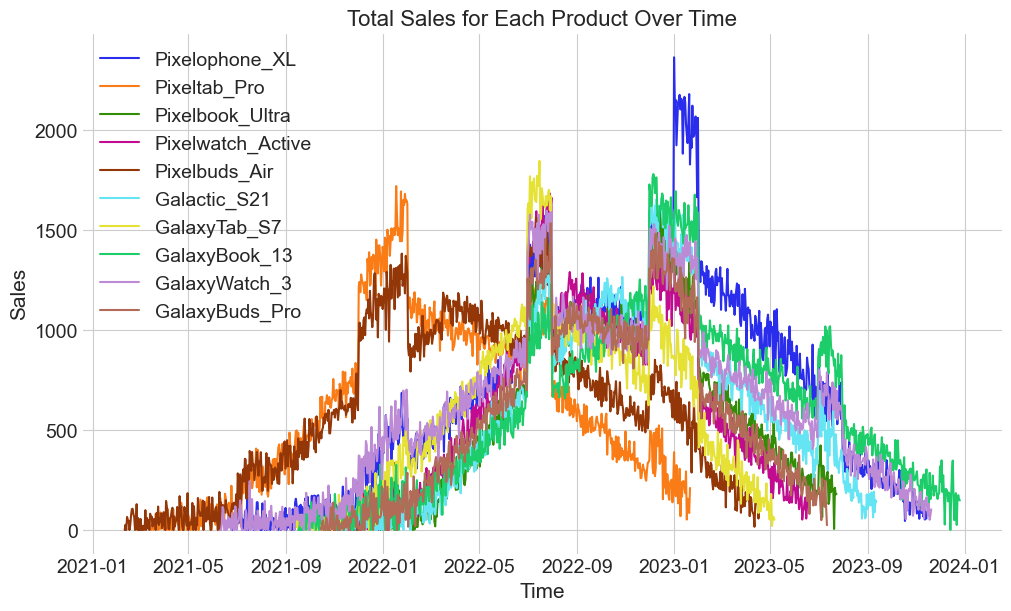

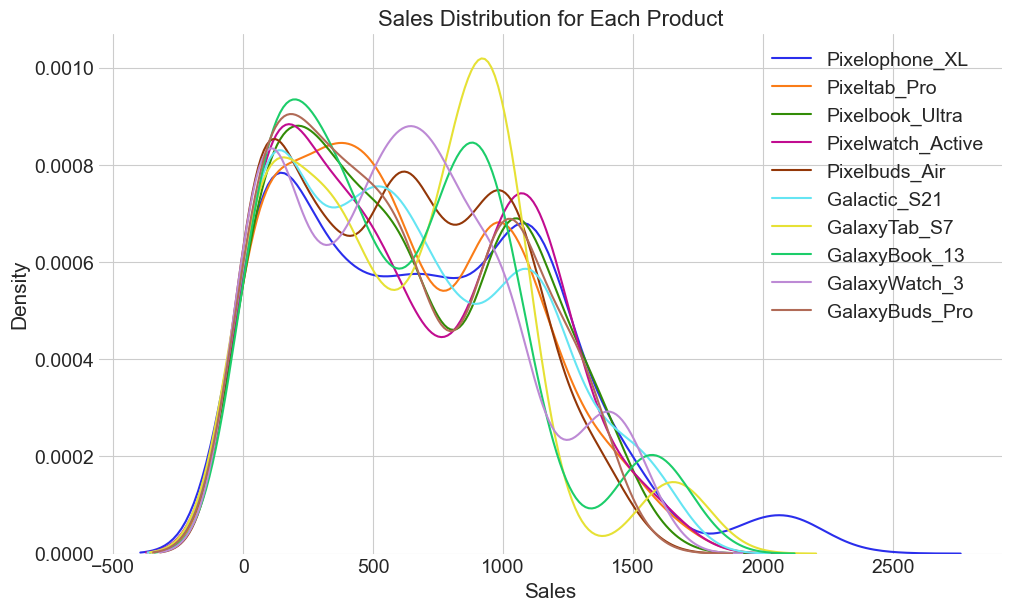

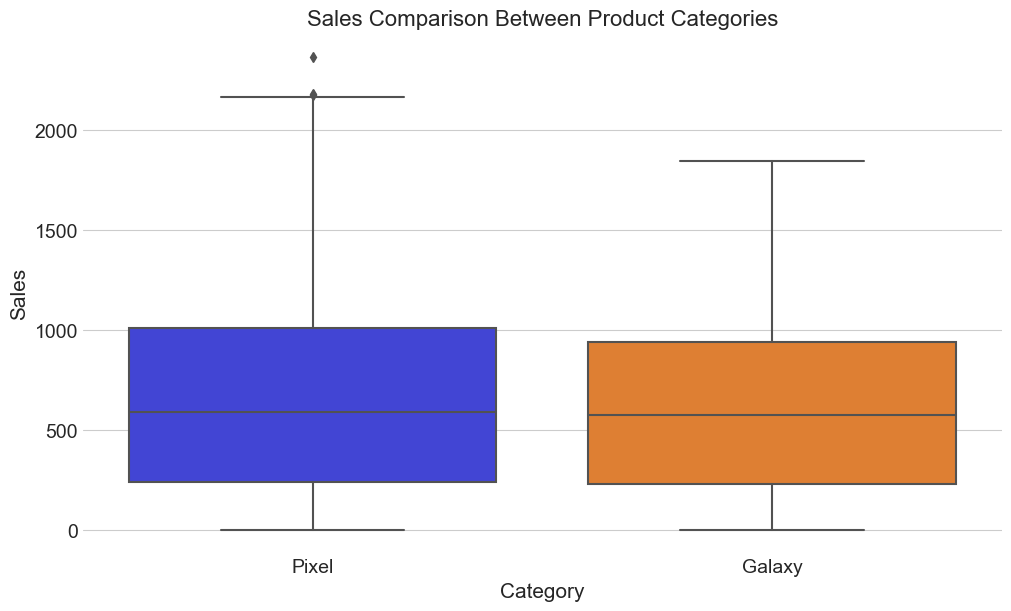

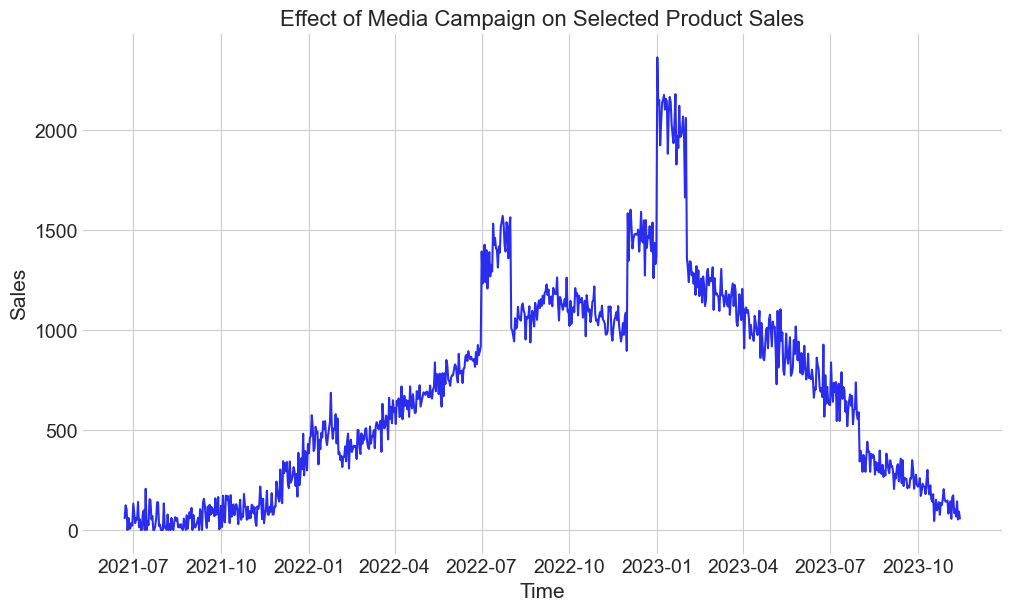

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style('whitegrid')

# Plot the total sales for each product over time
plt.figure(figsize=(10, 6))
for product in full_df['Product'].unique():
    data = full_df[full_df['Product'] == product]
    plt.plot(data['Date'], data['Sales'], label=product)
plt.legend(loc='best')
plt.title('Total Sales for Each Product Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.savefig('product saales.png', dpi=300) 
plt.show()


# Plot the sales distribution for each product
plt.figure(figsize=(10, 6))
for product in full_df['Product'].unique():
    data = full_df[full_df['Product'] == product]
    sns.kdeplot(data['Sales'], label=product)
plt.legend(loc='best')
plt.title('Sales Distribution for Each Product')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()


# Compare the sales of products in different categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=full_df)
plt.title('Sales Comparison Between Product Categories')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Check the effect of the media campaign on the selected product's sales
media_campaign_data = full_df[full_df['Product'] == media_campaign_product]
plt.figure(figsize=(10, 6))
plt.plot(media_campaign_data['Date'], media_campaign_data['Sales'])
plt.title('Effect of Media Campaign on Selected Product Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 98 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


===============================Synthetic Control================================
Formula: Pixelophone_XL ~ 0 + Galactic_S21 + GalaxyBook_13 + GalaxyBuds_Pro + GalaxyTab_S7 + GalaxyWatch_3 + Pixelbook_Ultra + Pixelbuds_Air + Pixeltab_Pro + Pixelwatch_Active
Model coefficients:
Galactic_S21                  0.21, 94% HDI [0.19, 0.24]
GalaxyBook_13                 0.00, 94% HDI [0.00, 0.01]
GalaxyBuds_Pro                0.00, 94% HDI [0.00, 0.01]
GalaxyTab_S7                  0.00, 94% HDI [0.00, 0.02]
GalaxyWatch_3                 0.69, 94% HDI [0.65, 0.72]
Pixelbook_Ultra               0.00, 94% HDI [0.00, 0.01]
Pixelbuds_Air                 0.03, 94% HDI [0.02, 0.04]
Pixeltab_Pro                  0.00, 94% HDI [0.00, 0.00]
Pixelwatch_Active             0.05, 94% HDI [0.02, 0.09]
sigma                         44.78, 94% HDI [43.91, 45.69]
None


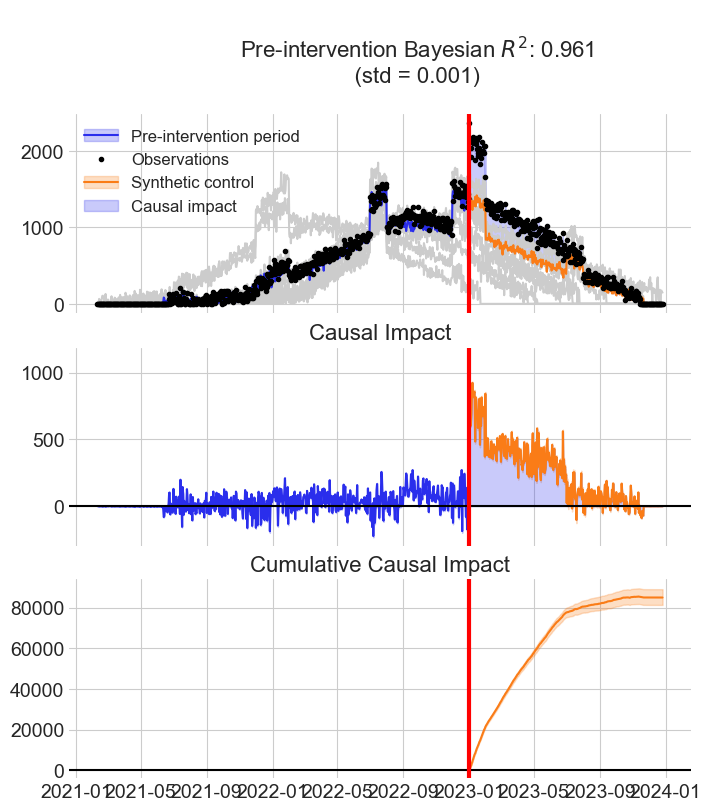

In [71]:
import pandas as pd
import causalpy as cp

# Convert the 'Date' column to datetime format
full_df['Date'] = pd.to_datetime(full_df['Date'])

# Filter out only the Pixelophone_XL data and other control products data
pixelophone_xl_data = full_df[full_df['Product'] == 'Pixelophone_XL'].set_index('Date')
other_products_data = full_df[full_df['Product'] != 'Pixelophone_XL'].pivot(index='Date', columns='Product', values='Sales')

# Combine the two DataFrames
combined_data = pd.concat([pixelophone_xl_data['Sales'], other_products_data], axis=1).fillna(0)

# Rename the 'Sales' column to 'Pixelophone_XL'
combined_data = combined_data.rename(columns={'Sales': 'Pixelophone_XL'})

# Create a formula for the Synthetic Control
# Assuming that the columns of other_products_data are the other product names
formula = "Pixelophone_XL ~ 0 + " + ' + '.join(other_products_data.columns)

# Use the start date of the campaign as the treatment_time
treatment_time = pd.to_datetime('2023-01-01')

# Run the Synthetic Control analysis
result = cp.pymc_experiments.SyntheticControl(
    combined_data,
    treatment_time,
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95}
    ),
)




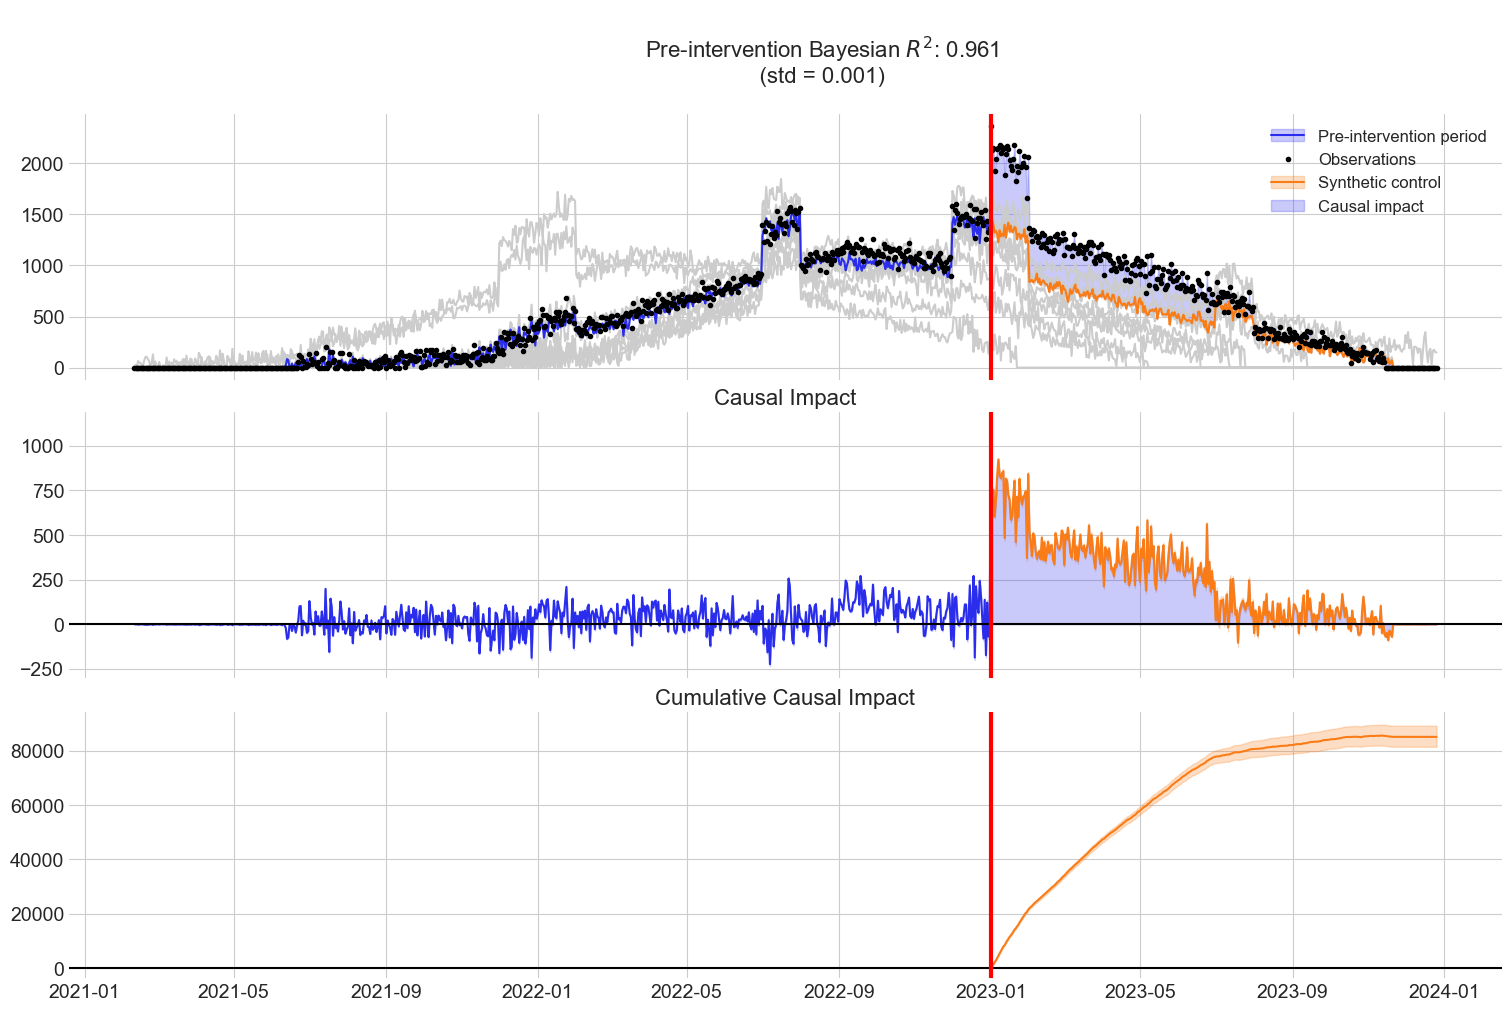

In [95]:
# Plot the results
result.plot(plot_predictors=True)

# Set the size of the current figure
plt.gcf().set_size_inches(15, 10)

# Save the figure in high resolution
plt.savefig('result_plot.png', dpi=300)

# Show the plot
plt.show()
